In [239]:
import numpy as np
from numpy.linalg import inv, norm
from matplotlib import pyplot as plt

# xs = fopen('./logistic_x.txt', 'r')
# ys = fopen('./logistic_y.txt', 'r')

with open('./logistic_x.txt', 'r') as xs_file:
    xs = np.array([np.concatenate(([1], [float(xp.strip()) for xp in x.strip().split('  ')])) for x in xs_file.readlines()])

with open('./logistic_y.txt', 'r') as ys_file:
    ys = np.array([int(float(y.strip())) for y in ys_file.readlines()])
    ys = [i if i == 1 else 0 for i in ys]

print(len(xs))
print(len(ys))

99
99


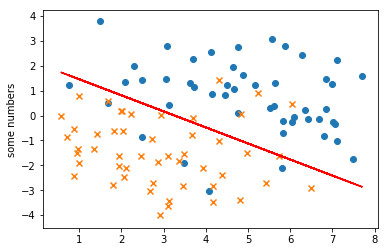

In [313]:
def draw_line(x, t):
    return (-t[0] - t[1]*x)/t[2]

def draw_graph():
    pos = [xs[i] for i in range(len(xs)) if ys[i] == 1]
    neg = [xs[i] for i in range(len(xs)) if ys[i] == 0]

    plt.scatter([x[1] for x in pos], [x[2] for x in pos], marker='o')
    plt.scatter([x[1] for x in neg], [x[2] for x in neg], marker='x')
    thetas = np.array([302.08529149,  -92.6179118,  -143.69778876])
    plt.plot(xs[:,1], [draw_line(x, thetas) for x in xs[:,1]], color='r')
    plt.ylabel('some numbers')
    
    plt.show()
    
draw_graph()
# thetas = [1,1,1]
# print([draw_line(x, thetas) for x in xs[:,1]], xs[:,1])
# # print(xs[:,1])

In [312]:
m = len(xs)
thetas = np.array([0.0,0.0,0.0])

def h(x, thetas):
    return 1 / (1 + np.e ** (-np.dot(thetas, x)))

def likelihood(ys, xs, thetas):
    return np.prod([(h(x, thetas) ** y) * ((1 - h(x, thetas)) ** (1 - y)) for y, x in zip(ys, xs)])

def log_likelihood(ys, xs, thetas):
    return np.sum([(y * np.log(h(x, thetas)) + (1 - y) * np.log(1 - h(x, thetas))) for x,y in zip(xs,ys)])

def gradient(ys, xs, thetas):
    return [sum([((ys[i] - h(xs[i], thetas)) * xs[i][k]) for i in range(m)]) for k in range(len(thetas))]

def hessian(xs,thetas):
    return np.array([[sum([(x[k]*x[s] * h(x, thetas) * (1 - h(x,thetas))) for x in xs]) for s in range(len(thetas))] for k in range(len(thetas))])

def newton_method(ys, xs, t):
    t_old = t
    t_new = t - inv(hessian(xs, t)).dot(gradient(ys, xs, t))
    
    for j in range(2):
        t_old = t_new
        t_new = t_new - inv(hessian(xs, t_new)).dot(gradient(ys, xs, t_new))
    
    return t_new

print(newton_method(ys, xs, thetas))

[ 302.08529149  -92.6179118  -143.69778876]
